In [41]:

import numpy as np
import pandas as pd
import re
# useed for searching text
from nltk.corpus import stopwords #doesent add much values 
from nltk.stem.porter import PorterStemmer #gives root word
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [42]:
df = pd.read_csv(r"C:\Users\prabh\OneDrive\Desktop\spam.csv", encoding='ISO-8859-1')


In [43]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3456,ham,Friendship poem: Dear O Dear U R Not Near But ...,NaN,NaN,NaN
269,spam,Ringtone Club: Get the UK singles chart on you...,NaN,NaN,NaN
2030,ham,"Ugh y can't u just apologize, admit u were wro...",NaN,NaN,NaN
2430,ham,How was txting and driving,NaN,NaN,NaN
2349,ham,Yar else i'll thk of all sorts of funny things.,NaN,NaN,NaN


In [44]:
df.shape

(5572, 5)

In [45]:
#1. data cleaning 
#2. EDA
#3.Text preprocessing 
#4.Model building
#5. evaluation
#6. improvements
#7. Streamlit
#8. heruku


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [47]:
#dropping last three columns


In [48]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [49]:
df.sample()

,v1,v2
1923,ham,Hello. They are going to the village pub at 8 ...


In [50]:
#renaming the columns
df.rename(columns={'v1':"target",'v2':"text"},inplace=True)

In [51]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
#ham and span into numbers


In [53]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [54]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [56]:
#check for duplicated values
df.duplicated().sum()

np.int64(403)

In [57]:
#removing duplicates while keeping first 
df=df.drop_duplicates(keep="first")

In [58]:
df.shape

(5169, 2)

In [59]:
#EDA

In [60]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [61]:
import matplotlib.pyplot as plt

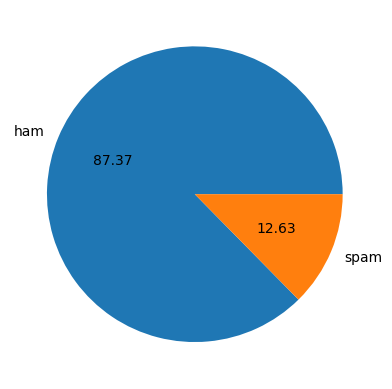

In [62]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [63]:
#data is slight imbalance

In [64]:
import nltk

In [65]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [66]:
# analysing characters in each text

In [67]:
df['num_characters']=df['text'].apply(len)

In [68]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [69]:
#number of words 
def count_words(text):
    words = text.split()  # Split the text by whitespace
    return len(words)
df['word_count']=df['text'].apply(count_words)

In [70]:
df.head()

,target,text,num_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [71]:
df['text'][1]

'Ok lar... Joking wif u oni...'

In [72]:
def count_sentences(text):
    sentences = nltk.sent_tokenize(text)  # Tokenize the text into sentences
    return len(sentences)  # Count the number of sentences

# Apply the function to the 'text' column
df['sentence_count'] = df['text'].apply(count_sentences)

# Display the DataFrame with the new sentence count column
print(df)

      target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  word_count  sentence_count  
0                111          20               2  
1                 29           6               2  
2                155          28          

In [73]:
df.describe()

,target,num_characters,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,15.340685,1.965564
std,0.332253,58.236293,11.068488,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,7.000000,1.000000
50%,0.000000,60.000000,12.000000,1.000000
75%,0.000000,117.000000,22.000000,2.000000
max,1.000000,910.000000,171.000000,38.000000


In [74]:
df[df['target']==0][['num_characters','word_count','sentence_count']].describe()
#ham

,num_characters,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.820195
std,56.358207,11.116240,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,38.000000


In [75]:
df[df['target']==1][['num_characters','word_count','sentence_count']].describe()

,num_characters,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.970904
std,30.137753,5.967672,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [76]:
# jo leghthy hoga voh spam ho skta hai


In [77]:
#creating historgran


In [78]:
port_stem = PorterStemmer()

In [105]:
def stemming(content):
    stemmed_content= re.sub(r"[^a-zA-Z\s]", ' ', content)
    stemmed_content= stemmed_content.lower()
    stemmed_content =stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if  word not in stopwords.words("english")]
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content
    #or
#import string 
#string.punctuatiuons
#def transform_text(text):
    #text=text.lower() #lowercase
    #text = nltk.word_tokenize(text) #tokenize\
    #y =[]
    #removing special characters
    #for i in text:
        #if i.isalnum():
            # y.append(i)
        
     #removing stopwords and puntuation
    #text = y[:] #cloning
    #y.clear()
        #for i in text:
              
              #if i not in stopwords.words('english') and i not in string.puntuation:
                  
                 #y.append(i)
        #return y 
    
    

In [111]:
 df['text']=df['text'].apply(stemming)


In [112]:
df['text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [113]:
from wordcloud import WordCloud

In [118]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

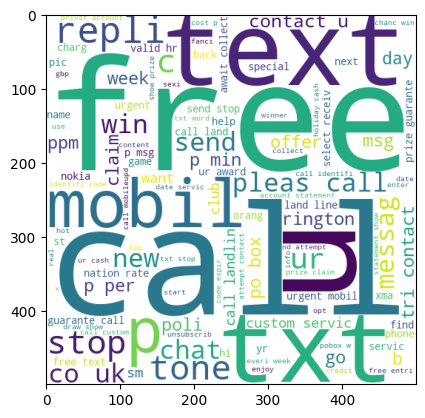

In [119]:
spam=wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))
plt.imshow(spam)

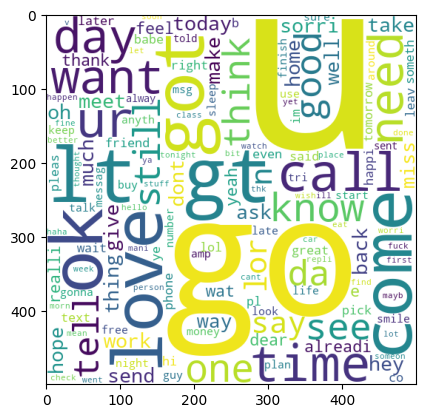

In [120]:
ham=wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))
plt.imshow(spam)

In [ ]:
#top 30 words


In [108]:

X=df['text'].values

vectorizor = TfidfVectorizer()
vectorizor.fit(X)
X = vectorizor.transform(X)

In [84]:
Y = df['target'].values

In [85]:
x_train,x_text, y_train,y_test = train_test_split(X,Y,test_size =0.2,random_state=1)

In [86]:
LOG = LogisticRegression()
LOG.fit(x_train,y_train)

LogisticRegression()

In [87]:
predict1=LOG.predict(x_train)
accuracy=accuracy_score(y_train,predict1)
print(accuracy)

0.9729141475211608


In [88]:
predict2=LOG.predict(x_text)
accuracy2=accuracy_score(y_test,predict2)
print(accuracy2)

0.9477756286266924


In [89]:
# the above is done via minimal dat5a preprocessing 